In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from quantopian.research.experimental import history

In [2]:
class Futures:
    def __init__(self, symbol_name, year, month):
        self.symbol_name = symbol_name
        self.year = year
        self.month = month
        self.symbol = self.symbols()

    def symbols(self):
        month = "FGHJKMNQUVXZ"[self.month - 1]
        return symbols("{}{}{}".format(self.symbol_name, month, self.year))
    
    def history(self, **kwargs):
        if "frequency" not in kwargs:
            kwargs["frequency"] = "daily"
        if "fields" not in kwargs:
            kwargs["fields"] = [
                'price', 'open_price','high', 'low', 'close_price',
                'volume', 'contract'
            ]
        if "start" not in kwargs:
            kwargs["start"] = self.symbol.start_date
        if "end" not in kwargs:
            kwargs["end"] = self.symbol.end_date
        return history(self.symbol, **kwargs)

In [3]:
ng17_vol = [
    Futures("NG", 17, i).history(fields="volume").iloc[-250:]
    for i in range(1, 13)
]
ng17_vol_df = pd.DataFrame(ng17_vol).T

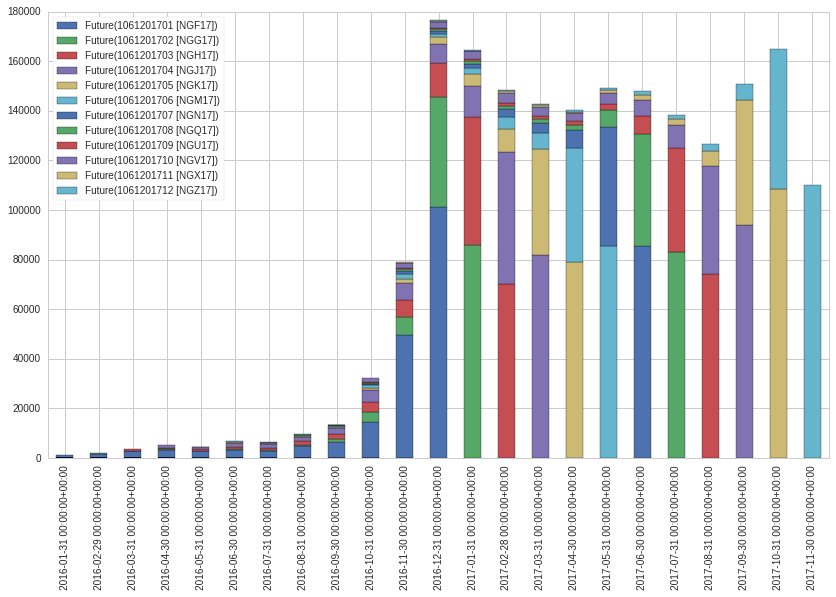

In [4]:
ng17_vol_df.resample("1M").mean().plot.bar(stacked=True)

In [5]:
ng17_price = [
    Futures("NG", 17, i).history(fields="price").iloc[-250:]
    for i in range(1, 13)
]
ng17_price_df = pd.DataFrame(ng17_price).T

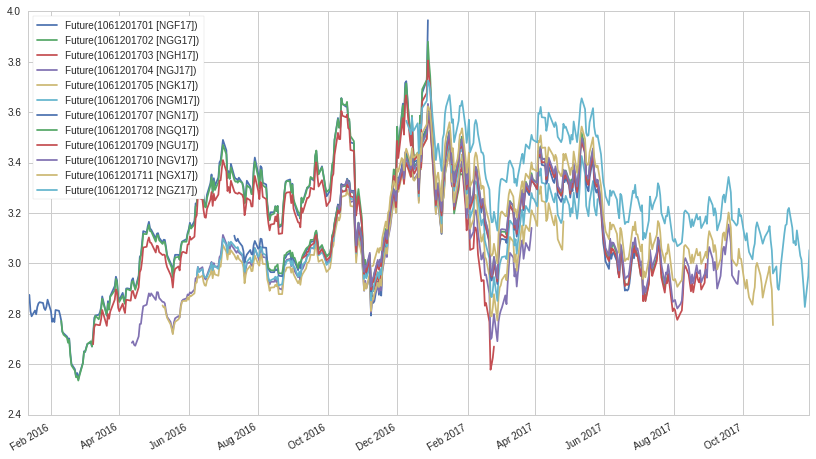

In [6]:
ng17_price_df.plot()

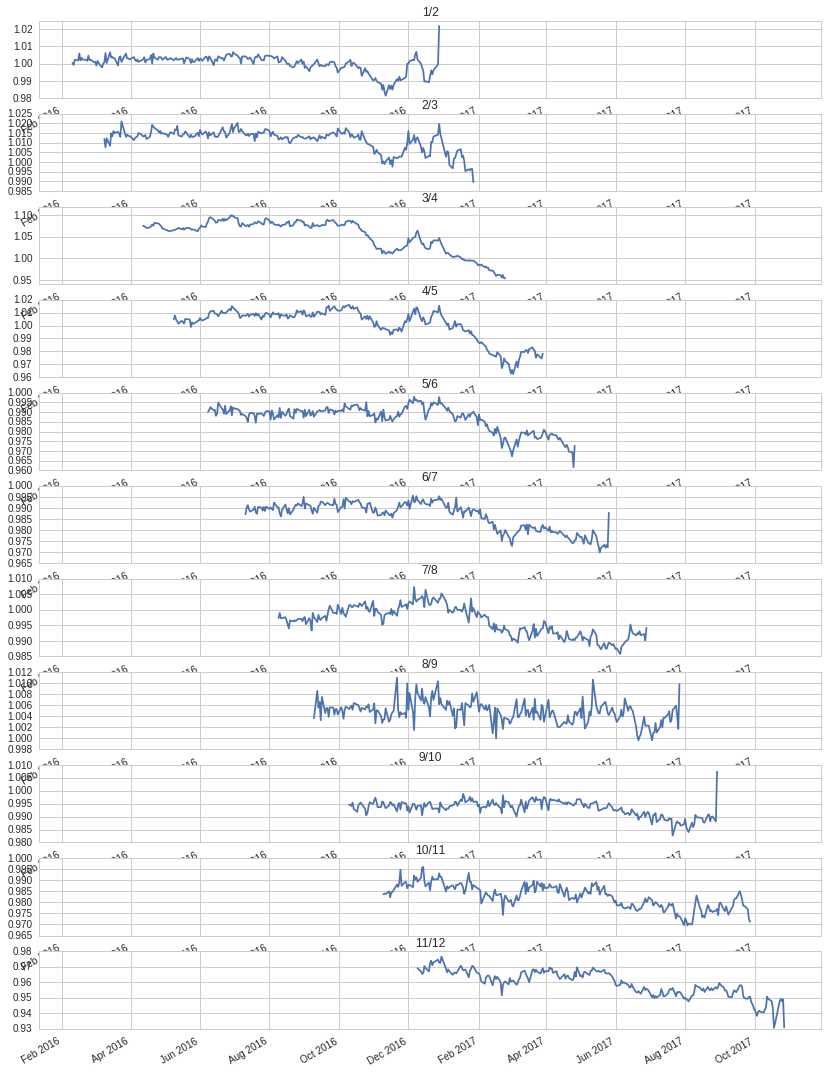

In [7]:
fig = plt.figure(figsize=(14, 20))
ax = [fig.add_subplot(11, 1, i) for i in range(1, 12)]
for i in range(11):
    (ng17_price_df.iloc[:, i] / ng17_price_df.iloc[:, i + 1]).plot(ax=ax[i])
    ax[i].set_title("{}/{}".format(i + 1, i + 2))

In [8]:
from itertools import product

maturities = sorted(product(range(10, 18), range(1, 13)), key=lambda x: x[1])
ho = [Futures("HO", *maturity) for maturity in maturities]
ho_dict = dict(zip(maturities, ho))

In [9]:
def plot_ratio(n, f):
    fig = plt.figure(figsize=(14, 20))
    ax = [fig.add_subplot(8, 1, i) for i in range(1, 9)]
    fig.suptitle("{}/{}".format(n, f), fontsize=20)
    for i, y in enumerate(range(10, 18)):
        ratio = (
            ho_dict[(y, n)].history(fields="price").iloc[-200:]
            / ho_dict[(y, f)].history(fields="price").iloc[-200:]
        ).values
        ax[i].plot(ratio)
        ax[i].set_title("20{}".format(y))

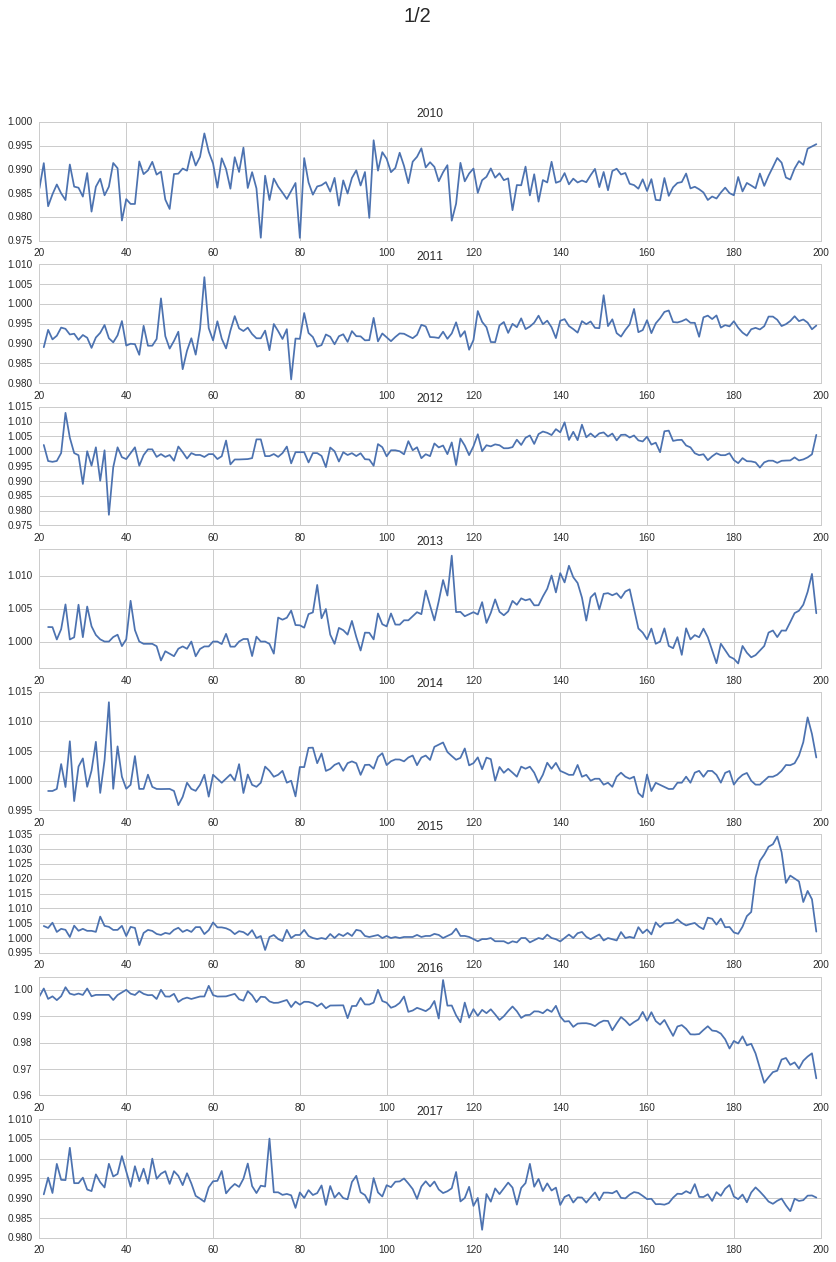

In [10]:
plot_ratio(1, 2)

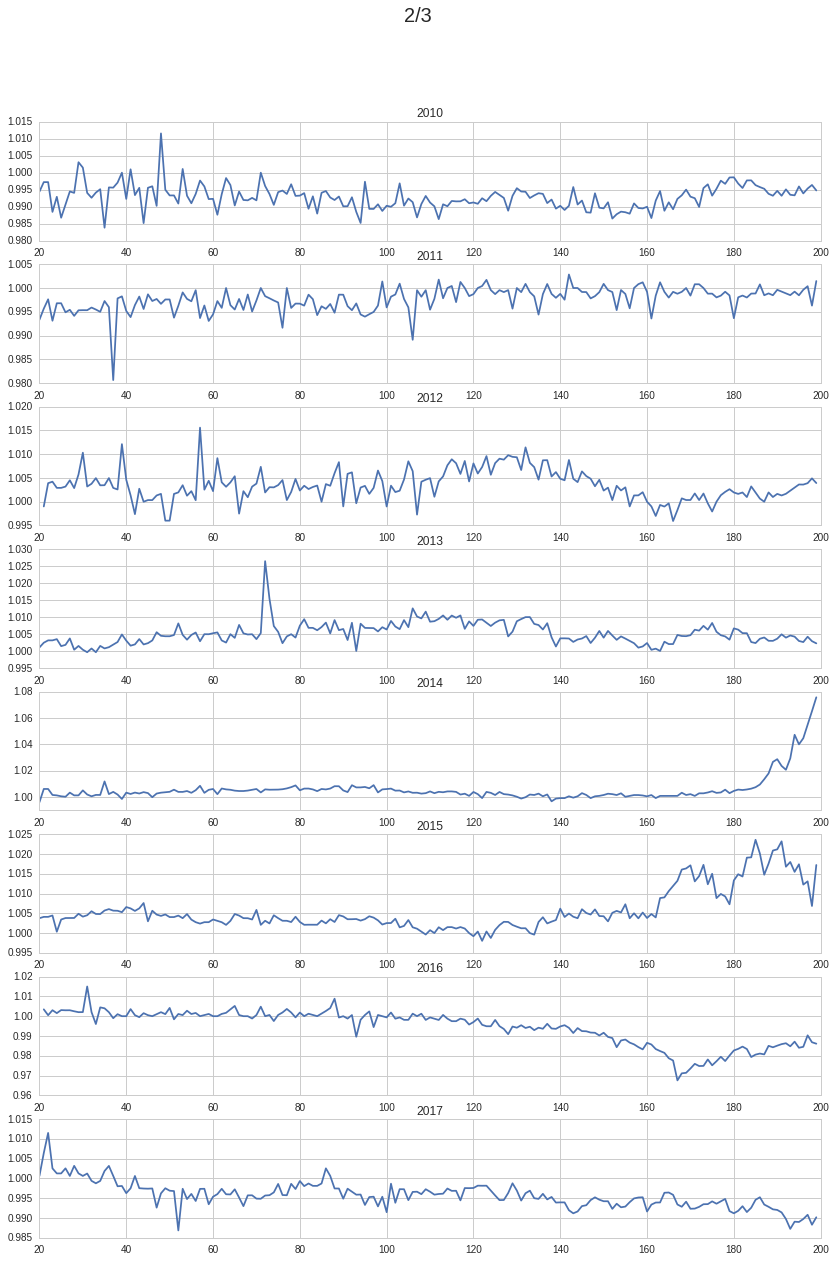

In [11]:
plot_ratio(2, 3)

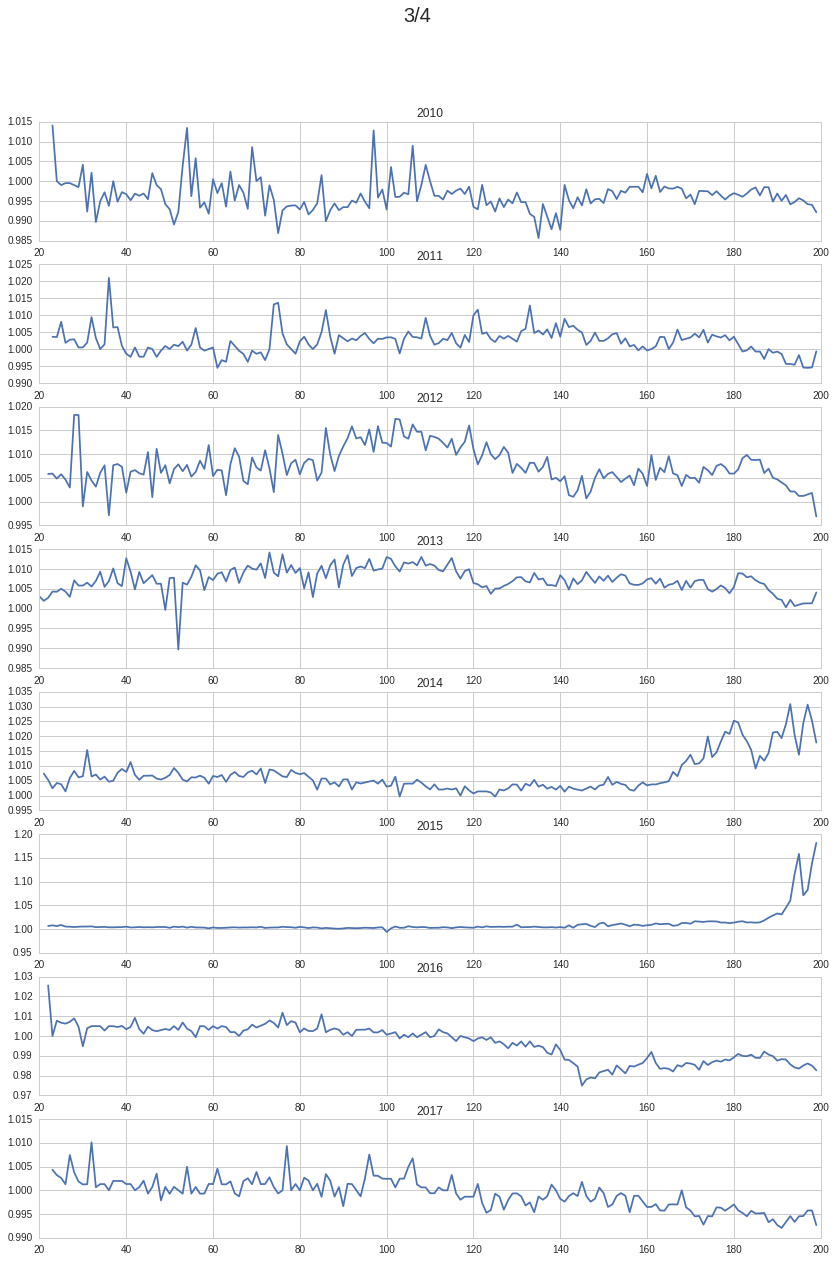

In [12]:
plot_ratio(3, 4)

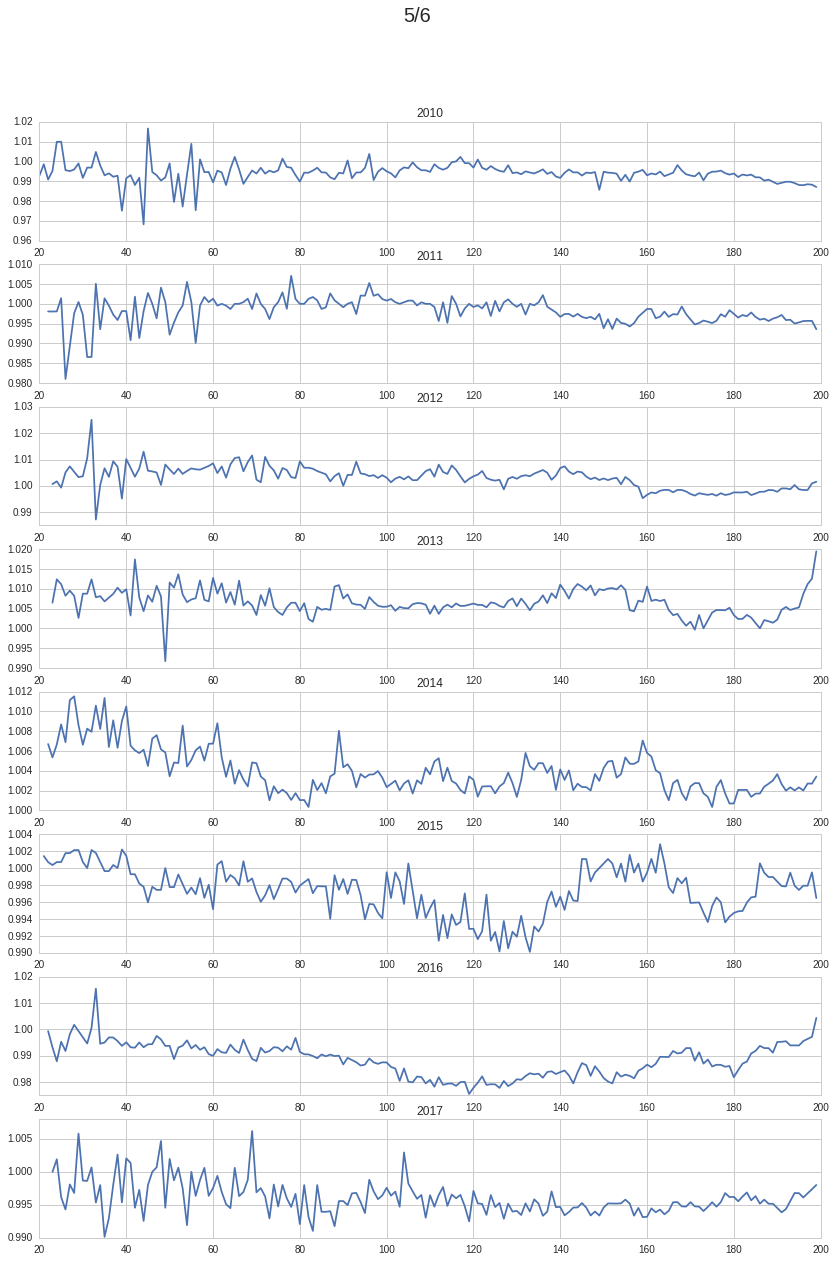

In [13]:
plot_ratio(5, 6)

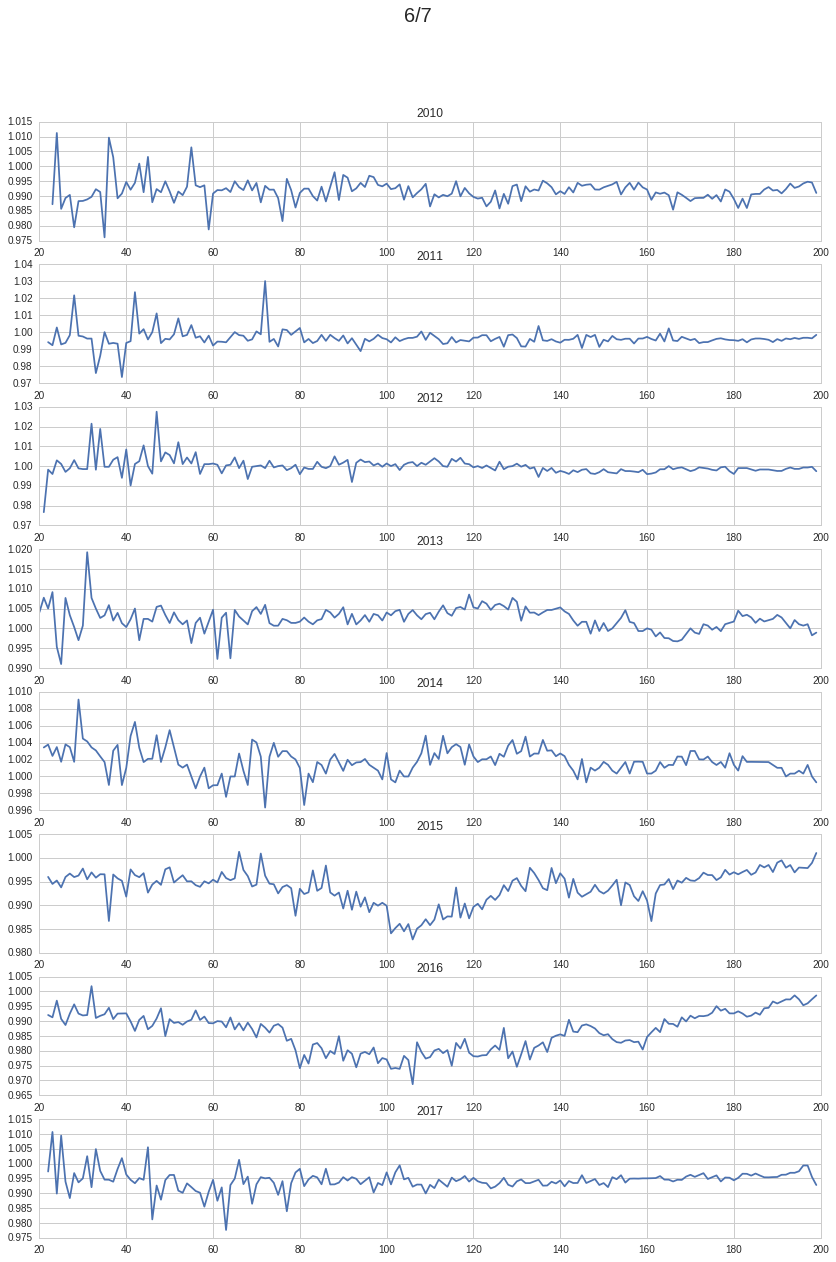

In [14]:
plot_ratio(6, 7)

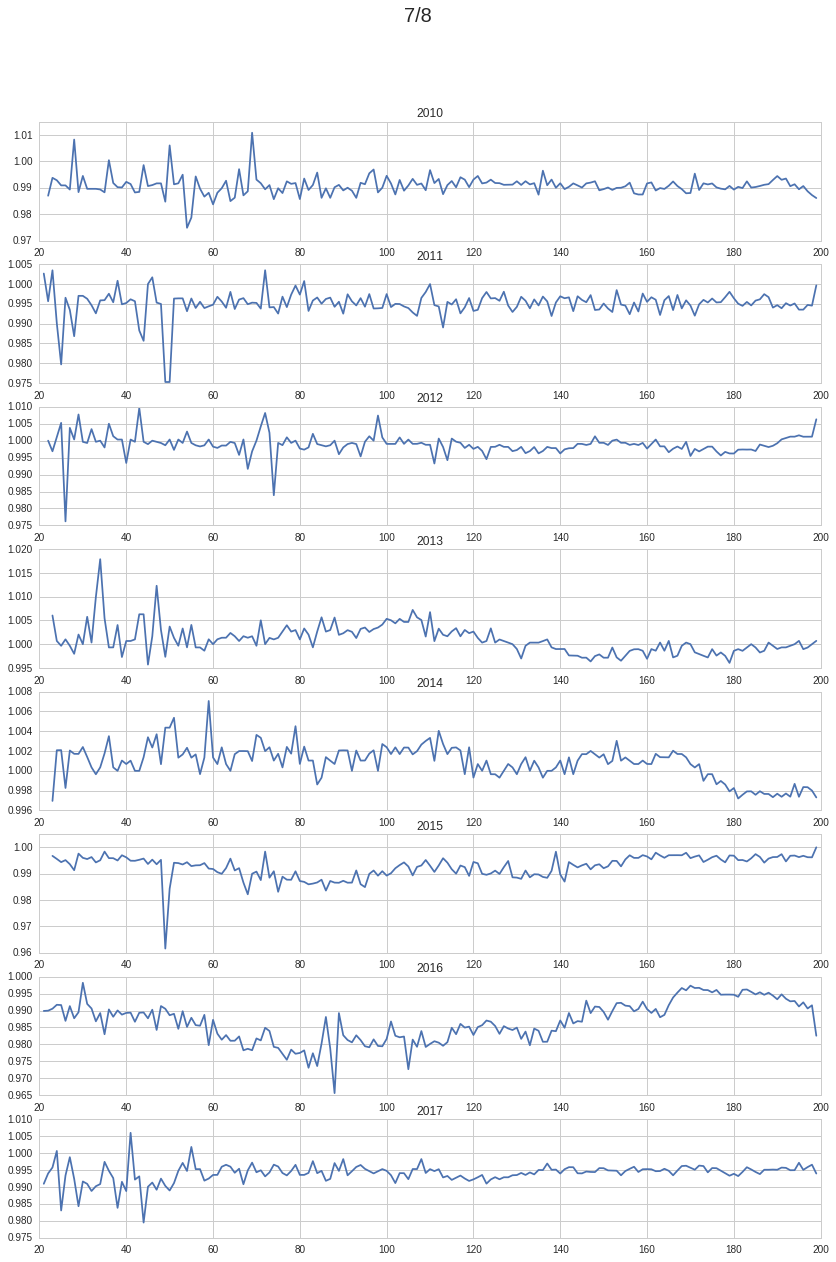

In [15]:
plot_ratio(7, 8)

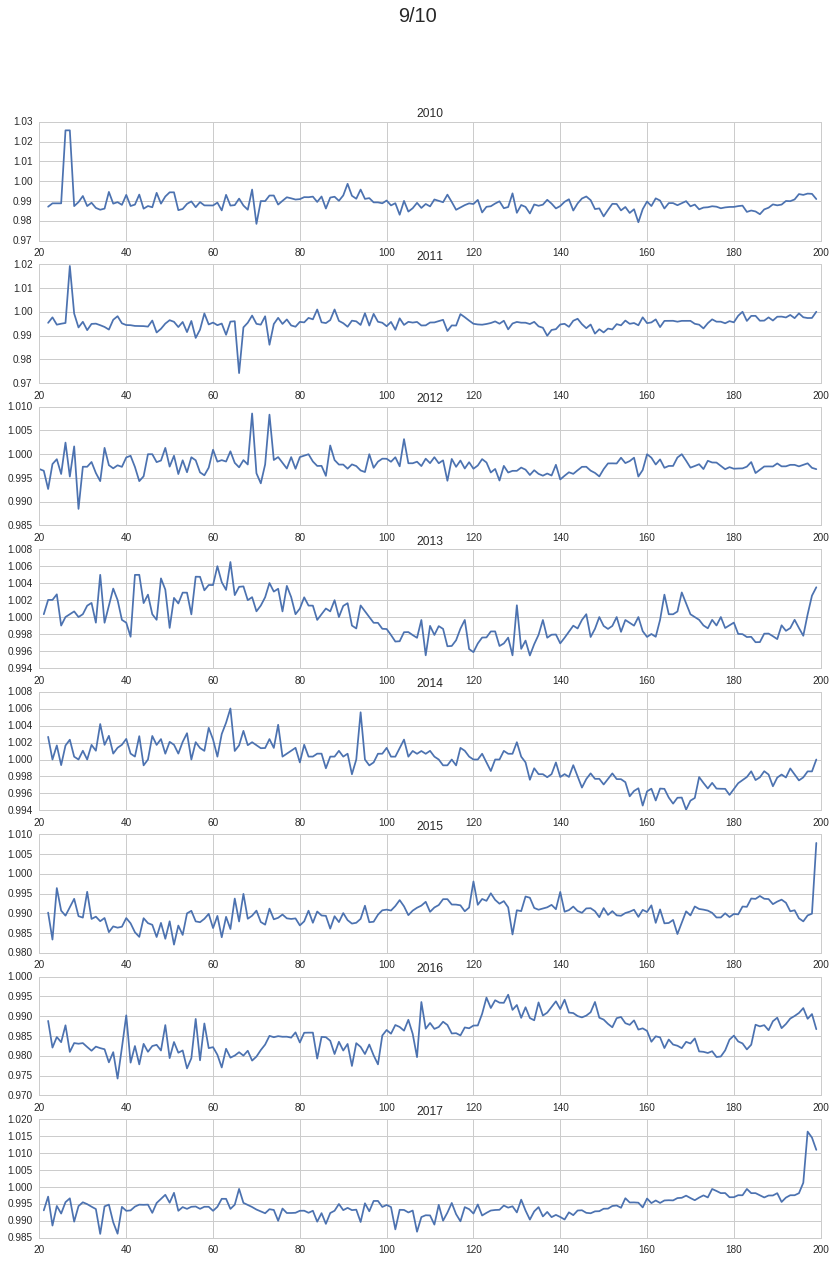

In [16]:
plot_ratio(9, 10)

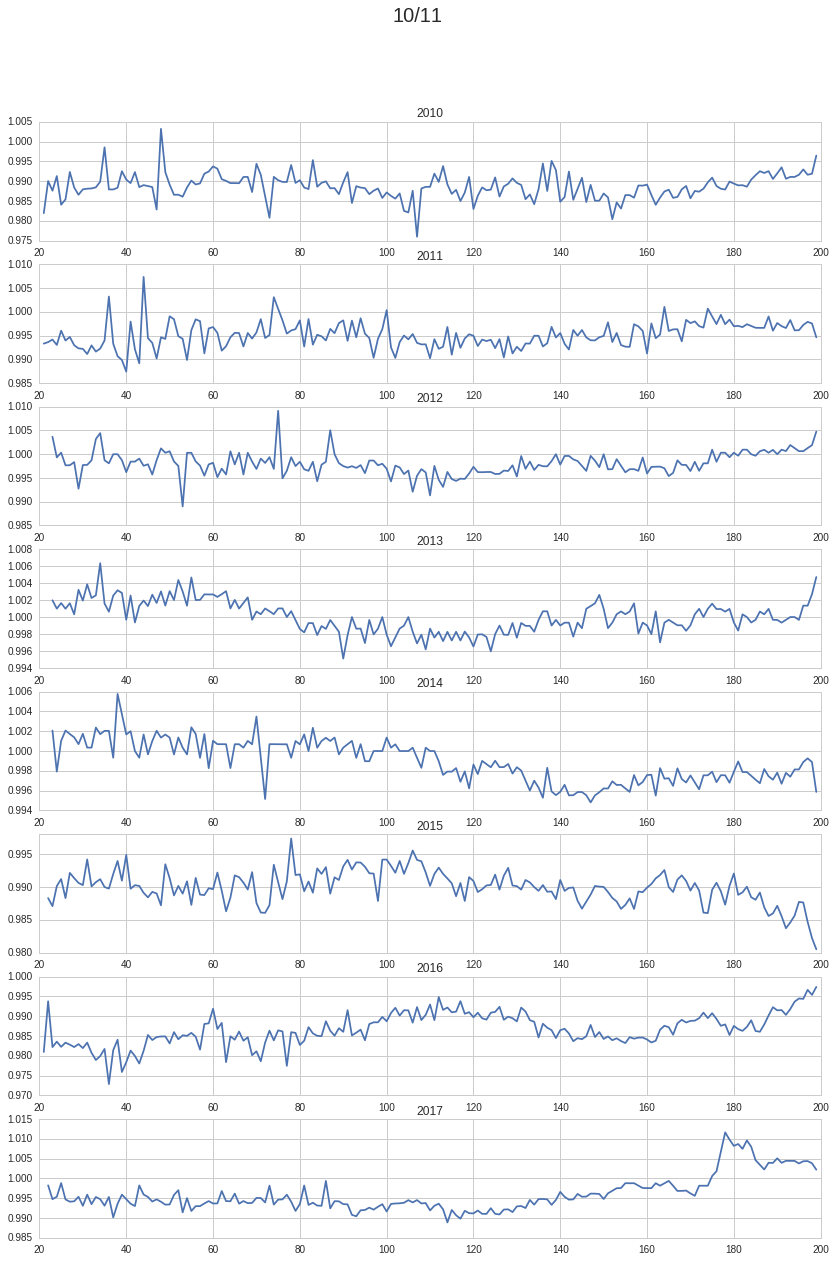

In [17]:
plot_ratio(10, 11)

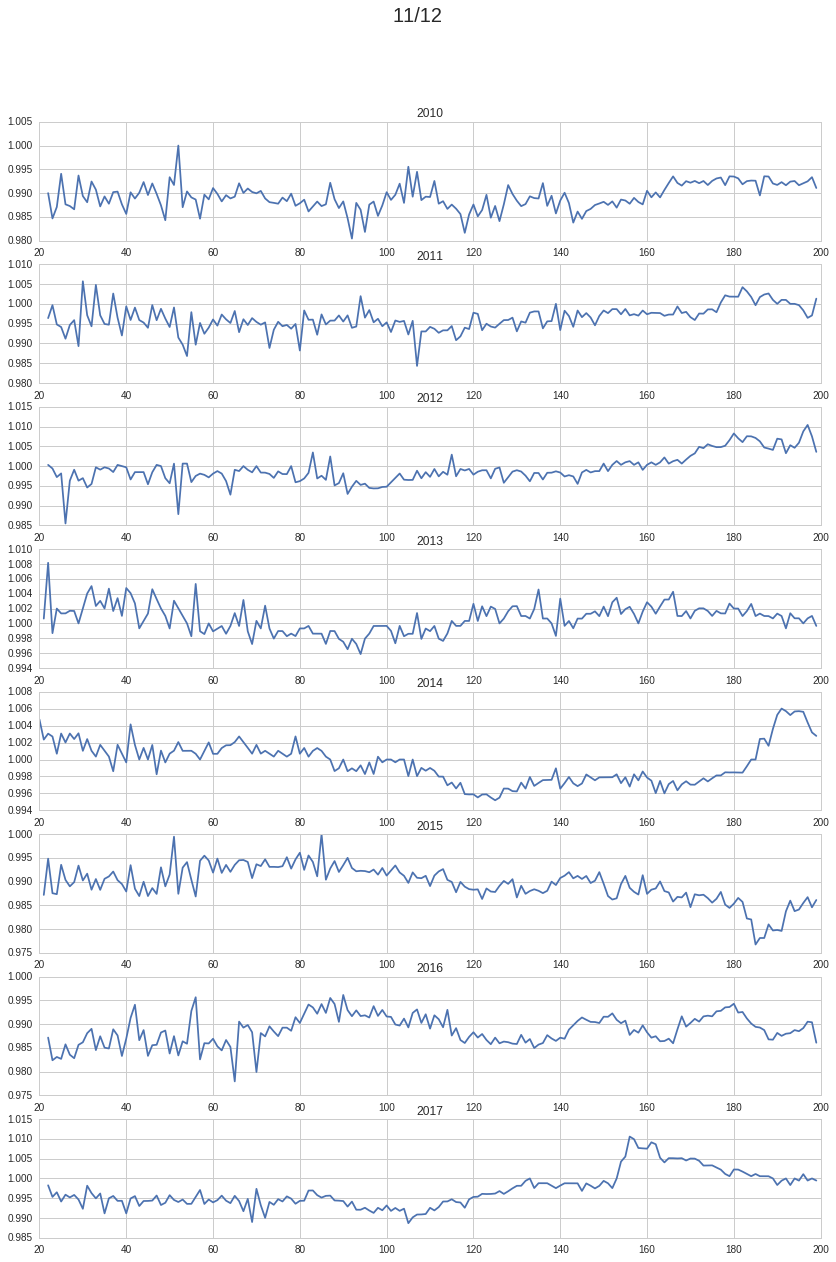

In [18]:
plot_ratio(11, 12)